# 15. Time Series Analysis toolkits

## 15.1 Scikit-learn

The `scikit-learn` library is primarily designed for traditional machine learning tasks, which assume independent and identically distributed (i.i.d) data. While it does not provide specialized algorithms for time series analysis and forecasting, certain aspects of time series analysis can still be performed using `scikit-learn`.



### 15.1.1 How to use
Here's a general outline of how you can incorporate `scikit-learn` in your time series analysis workflow:

1. Import the necessary modules:
   ```python
   import numpy as np
   import pandas as pd
   from sklearn.model_selection import train_test_split
   from sklearn.preprocessing import StandardScaler
   from sklearn.linear_model import LinearRegression
   from sklearn.metrics import mean_squared_error
   ```

2. Load and preprocess your time series data:
   ```python
   df = pd.read_csv('your_data.csv')
   df['timestamp'] = pd.to_datetime(df['timestamp'])
   df.set_index('timestamp', inplace=True)
   # Perform data preprocessing, handling missing values, outliers, etc.
   X = df.drop('target_variable', axis=1)
   y = df['target_variable']
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
   ```

3. Extract features from your time series data:
   ```python
   # Perform feature extraction using methods like rolling statistics, Fourier transforms, wavelet transforms, etc.
   # Add the extracted features as additional columns in your DataFrame or create a separate feature matrix
   ```

4. Scale your features:
   ```python
   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_train)
   X_test_scaled = scaler.transform(X_test)
   ```

5. Train a model for time series forecasting:
   ```python
   model = LinearRegression()
   model.fit(X_train_scaled, y_train)
   ```

6. Evaluate the model:
   ```python
   y_pred_train = model.predict(X_train_scaled)
   mse_train = mean_squared_error(y_train, y_pred_train)

   y_pred_test = model.predict(X_test_scaled)
   mse_test = mean_squared_error(y_test, y_pred_test)
   ```

7. Perform forecasting and make predictions for future time steps:
   ```python
   # Assuming you have new unseen data for forecasting
   X_unseen_scaled = scaler.transform(X_unseen)
   y_pred_unseen = model.predict(X_unseen_scaled)
   ```

Please note that this approach treats each time step as an independent sample, which may not capture the temporal dependencies in the data. For more advanced time series forecasting techniques, specialized libraries like `statsmodels` or deep learning frameworks like `TensorFlow` and `PyTorch` that offer dedicated functionality for handling time series data are recommended.

### 15.1.2 Example Code
The code provides an example of how to use `scikit-learn` models for time series forecasting using the airline passenger dataset. It demonstrates the training, prediction, evaluation, and visualization steps in a simple and concise manner.

SVR Mean Squared Error: 43397.52362976247
Random Forest Mean Squared Error: 1743.6006482758623
Ridge Mean Squared Error: 3.437100833017068


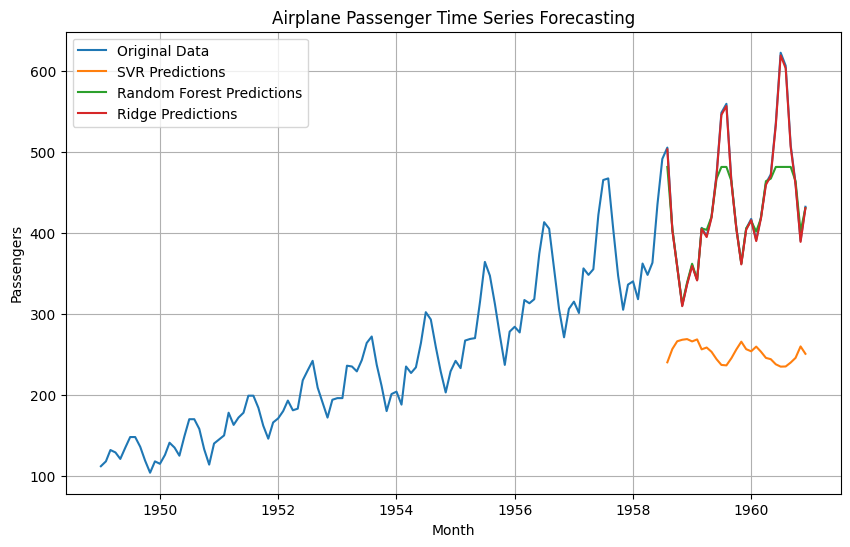

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import urllib.request

# Download the airplane passenger dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
filename = 'airline_passengers.csv'
urllib.request.urlretrieve(url, filename)

# Load the airplane passenger dataset
df = pd.read_csv(filename)

# Convert the 'Month' column to a datetime type
df['Month'] = pd.to_datetime(df['Month'])

# Set the 'Month' column as the index
df.set_index('Month', inplace=True)

# Split data into train and test sets
X = df[['Passengers']].values
y = df['Passengers'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train_scaled, y_train)

# Train Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate mean squared error
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"SVR Mean Squared Error: {mse_svr}")
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Ridge Mean Squared Error: {mse_ridge}")

# Visualize the original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'], label='Original Data')
plt.plot(df.index[-len(y_pred_svr):], y_pred_svr, label='SVR Predictions')
plt.plot(df.index[-len(y_pred_rf):], y_pred_rf, label='Random Forest Predictions')
plt.plot(df.index[-len(y_pred_ridge):], y_pred_ridge, label='Ridge Predictions')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Airplane Passenger Time Series Forecasting')
plt.legend()
plt.grid(True)  # Add grid
plt.show()



In this code:

1. The code begins by importing the necessary libraries and modules, including NumPy, Pandas, Matplotlib, and scikit-learn components such as SVR, RandomForestRegressor, Ridge, train_test_split, mean_squared_error, and StandardScaler.

2. The code then proceeds to download the airline passenger dataset from a specified URL and saves it as a CSV file.

3. The dataset is loaded into a Pandas DataFrame, and the 'Month' column is converted to a datetime type and set as the index.

4. The data is split into training and test sets using the train_test_split function from scikit-learn. The 'Passengers' column is extracted as the target variable (y), and the scaled version of this column is stored in X.

5. The features (X) are scaled using StandardScaler to normalize the data.

6. Three different models are trained on the scaled training data:
   - Support Vector Regression (SVR) with a radial basis function (RBF) kernel
   - Random Forest Regressor with 100 estimators
   - Ridge Regression with the default alpha value of 1.0

7. The trained models are used to make predictions on the scaled test data.

8. The mean squared error (MSE) is calculated for each model by comparing the actual passenger values from the test set (y_test) with the predicted values.

9. The MSE values for each model are printed to the console.

10. Finally, the original passenger data and the predictions from all three models are plotted using Matplotlib, allowing visual comparison between the actual data and the forecasted values.



## 15.2. Statsmodels
Statsmodels is a powerful Python library that provides a wide range of statistical models and tools for statistical analysis. It includes a dedicated module for time series analysis and forecasting, making it a popular choice for working with time-dependent data.

Statsmodels offers various functionalities for time series analysis and forecasting, including:

1. Decomposition: Statsmodels provides methods to decompose time series data into its components, such as trend, seasonality, and residuals. This allows for a deeper understanding of the underlying patterns and structures in the data.

2. Autoregressive Integrated Moving Average (ARIMA) models: ARIMA models are widely used for time series forecasting. Statsmodels offers classes for fitting ARIMA models, estimating model parameters, and making predictions.

3. Seasonal ARIMA (SARIMA) models: SARIMA models extend the capabilities of ARIMA models to handle seasonal patterns in time series data. Statsmodels includes classes for SARIMA modeling, allowing for forecasting with seasonal variations.

4. Exponential Smoothing (ETS) models: ETS models are another popular approach for time series forecasting. Statsmodels supports different variations of exponential smoothing models, including simple exponential smoothing, Holt's linear trend method, and Holt-Winters' seasonal method.

5. State Space models: Statsmodels provides classes for modeling time series data using state space models. These models allow for flexible specification of the underlying state dynamics, making them suitable for complex time series analysis and forecasting tasks.

6. Diagnostic tools: Statsmodels offers a range of diagnostic tools to assess the quality and appropriateness of time series models. These tools include residual analysis, model evaluation metrics, and hypothesis testing for model assumptions.

In addition to these capabilities, Statsmodels integrates well with other scientific libraries in Python, such as NumPy, Pandas, and Matplotlib, making it a comprehensive solution for time series analysis and forecasting.

Overall, Statsmodels is a valuable library for researchers, data analysts, and practitioners who need to analyze, model, and forecast time series data. Its rich set of functionalities, flexibility, and integration with other scientific libraries make it a versatile tool for various time series analysis tasks.


### 15.2.1 How to use
Here's a general overview of how you can use `statsmodels` for time series analysis and forecasting:

1. Import the necessary modules: In your Python script or notebook, import the required modules from `statsmodels`, as well as any additional libraries you plan to use for analysis or visualization.

   ```python
   import pandas as pd
   import matplotlib.pyplot as plt
   import statsmodels.api as sm
   # Import other required libraries
   ```

2. Load and preprocess time series data: Load your time series data into a suitable data structure. `statsmodels` works well with Pandas DataFrames. Ensure that your DataFrame has a DateTime index representing the timestamps and a column for the target values. You may need to preprocess the data if it's not in the desired format.

   ```python
   # Example: Creating a Pandas DataFrame with timestamps and target values
   df = pd.DataFrame({
       'date': ['2021-01-01', '2021-01-02', '2021-01-03'],
       'value': [10, 15, 12]
   })

   # Convert the 'date' column to datetime type and set it as the index
   df['date'] = pd.to_datetime(df['date'])
   df.set_index('date', inplace=True)
   ```

3. Explore and visualize the time series: Before applying time series models, it's helpful to explore and visualize the data to gain insights into its properties and patterns.

   ```python
   # Example: Plotting the time series
   plt.plot(df.index, df['value'])
   plt.xlabel('Time')
   plt.ylabel('Value')
   plt.title('Time Series Plot')
   plt.show()
   ```

4. Fit a time series model: Select an appropriate time series model from `statsmodels` and fit it to your data.

   ```python
   # Example: Fitting an ARIMA model
   model = sm.tsa.ARIMA(df['value'], order=(1, 0, 0))
   results = model.fit()
   ```

5. Review model diagnostics: After fitting the model, review the diagnostics to assess its adequacy and performance.

   ```python
   # Example: Reviewing model diagnostics
   print(results.summary())
   sm.graphics.tsa.plot_acf(results.resid, lags=20)
   plt.show()
   ```

6. Generate forecasts: Once the model is fitted, you can use it to generate forecasts for future time points.

   ```python
   # Example: Generating forecasts
   forecast = results.get_forecast(steps=10)
   forecast_df = forecast.summary_frame()
   ```

7. Visualize the results: Use plots and visualizations to examine the forecasts and compare them with the observed data.

   ```python
   # Example: Plotting the observed data and forecasts
   plt.plot(df.index, df['value'], label='Observed')
   plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast')
   plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='gray', alpha=0.2)
   plt.xlabel('Time')
   plt.ylabel('Value')
   plt.title('Forecast Plot')
   plt.legend()
   plt.show()
   ```

Remember to consult the `statsmodels` documentation for more information on available models, model parameters, and additional functionalities provided by the library. Additionally, `statsmodels` offers various advanced time series models and tools such as SARIM

### 15.2.2 Example Code
This code provides a practical example of using statsmodels for time series analysis and forecasting. By applying it to the "Airline Passengers" dataset, you can observe the decomposition of the time series, make predictions for future time points, and visualize the forecasted values with associated uncertainty.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Download the Airline Passengers dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True)




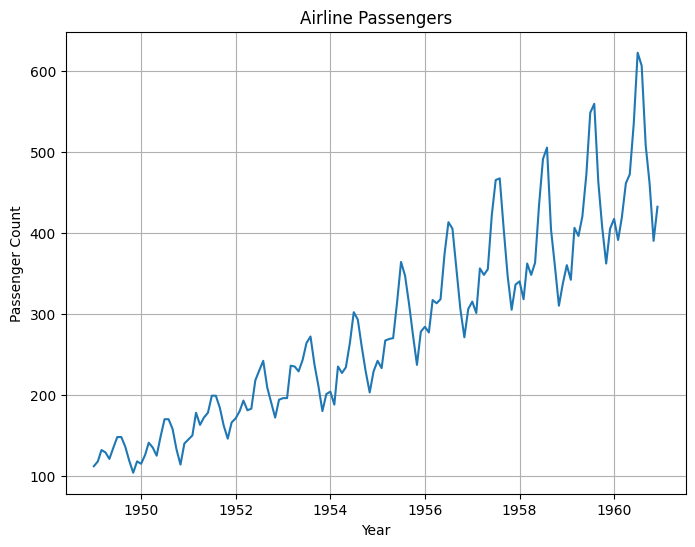

In [ ]:
# Plot the original time series
plt.figure(figsize=(8, 6))
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.title('Airline Passengers')
plt.grid(True)  # Add grid lines
plt.show()

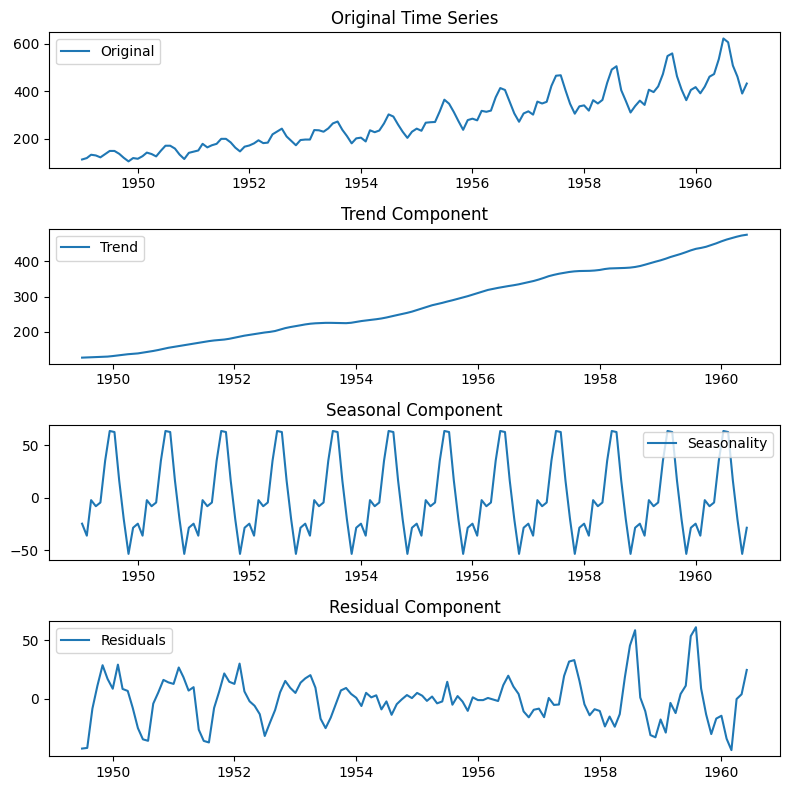

In [ ]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(df, model='additive')

# Plot the decomposed components
plt.figure(figsize=(8, 8))

plt.subplot(411)
plt.plot(df, label='Original')
plt.title('Original Time Series')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.title('Seasonal Component')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.title('Residual Component')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [ ]:
# Perform time series forecasting using SARIMAX model
model = sm.tsa.SARIMAX(df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Generate future dates for forecasting
future_dates = pd.date_range(start=df.index[-1], periods=24, freq='MS')

# Make predictions for the future dates
forecast = results.get_forecast(steps=24)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()  # Get all confidence intervals

# Extract the lower and upper confidence intervals
ci_lower = ci.iloc[:, 0]  # First column contains lower confidence intervals
ci_upper = ci.iloc[:, 1]  # Second column contains upper confidence intervals


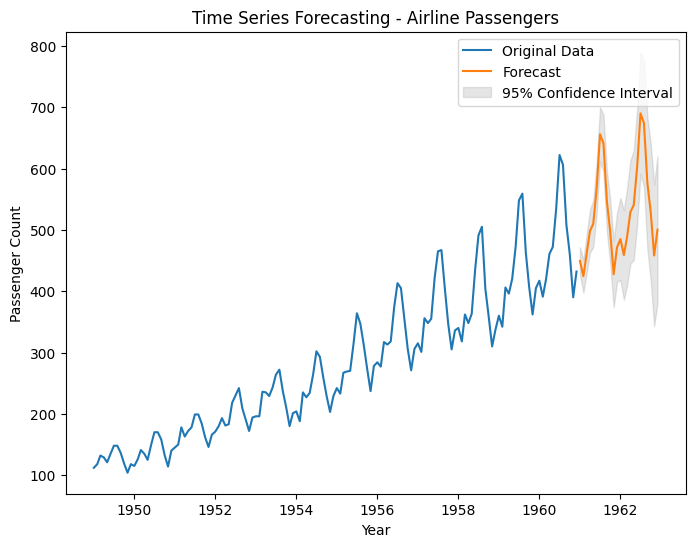

In [ ]:
# Plot the original time series with the forecasted values
plt.figure(figsize=(8, 6))
plt.plot(df, label='Original Data')
plt.plot(forecast_values, label='Forecast')
plt.fill_between(forecast_values.index, ci_lower, ci_upper, color='gray', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.title('Time Series Forecasting - Airline Passengers')
plt.legend()
plt.show()


The code demonstrates the use of `statsmodels` for time series analysis and forecasting using the "Airline Passengers" dataset.

First, the code downloads the dataset from a provided URL using `pd.read_csv` and assigns it to a DataFrame.

The original time series of monthly passenger counts is then plotted to visualize the data.

Next, the code decomposes the time series into its trend, seasonal, and residual components using `seasonal_decompose` from `statsmodels`. Each component is plotted separately to provide insights into their individual patterns.

Moving on to forecasting, the code utilizes the SARIMAX model from `statsmodels`. It fits the model to the original time series data and specifies the order and seasonal order parameters for the model.

To generate future dates for forecasting, the code uses `pd.date_range` with the last date in the dataset as the starting point and a frequency of monthly ('MS') to create 24 future dates.

The `get_forecast` method of the fitted model is then used to make predictions for the future dates.

The forecasted values and confidence intervals are extracted from the results. In this updated version, the code retrieves the confidence intervals using `forecast.conf_int()` and stores them in separate variables.

Finally, the code plots the original time series along with the forecasted values. The forecasted values are shown as a line graph, and the confidence intervals are displayed as a shaded region around the forecasted values.

## 15.3 Pandas
Pandas is a powerful and popular Python library that provides high-performance data manipulation and analysis tools. It offers extensive capabilities for working with structured data, including time series analysis. Here are some of the key capabilities and use cases of Pandas in time series analysis:

1. Data Structures: Pandas provides two primary data structures, namely Series and DataFrame, which are well-suited for handling time series data. A Series is a one-dimensional array-like object that can hold any data type, while a DataFrame is a two-dimensional table-like structure with labeled columns that can store heterogeneous data.

2. Time Indexing: Pandas supports flexible time indexing, allowing you to associate time-related metadata with your data. It provides specialized data structures like `DatetimeIndex` and `PeriodIndex` that make it easy to manipulate and analyze time series data.

3. Data Alignment: Pandas allows you to align time series data based on a common time index. It offers various methods for handling missing or misaligned data, such as forward-fill, backward-fill, and interpolation, ensuring consistent and accurate analysis.

4. Resampling and Frequency Conversion: Pandas provides functions for resampling time series data, allowing you to convert data from one frequency to another. You can upsample (increase frequency) or downsample (decrease frequency) your data, aggregating or interpolating values as needed.

5. Time Shifting and Lagging: Pandas enables you to shift time series data forward or backward in time. This functionality is useful for calculating time differences, creating lags, or aligning data for comparative analysis.

6. Rolling Window Operations: Pandas supports rolling window operations, which involve applying a function to a sliding window of data. This is valuable for calculations such as moving averages, cumulative sums, or any other operation that requires analyzing data over a specific time period.

7. Time Zone Handling: Pandas provides robust support for handling time zones and converting timestamps between different time zones. This is essential when working with time series data collected from different sources or analyzing data across different time zones.

Use Cases in Time Series Analysis:

1. Data Exploration: Pandas simplifies the process of loading, cleaning, and exploring time series data. It allows you to quickly inspect the data, perform summary statistics, visualize patterns, and gain insights into the underlying patterns and trends.

2. Data Preprocessing: Pandas provides various functions for handling missing values, outliers, and data inconsistencies in time series data. It enables you to preprocess and clean the data before applying further analysis techniques.

3. Feature Engineering: Pandas offers a wide range of tools for feature engineering in time series analysis. You can create new time-related features, extract lagged variables, compute rolling statistics, and generate aggregated features for modeling purposes.

4. Time Series Modeling: Pandas seamlessly integrates with other Python libraries, such as NumPy, SciPy, and scikit-learn, making it an excellent choice for time series modeling. You can use Pandas to prepare the data, build models like ARIMA, SARIMA, or Prophet, and evaluate the performance of the models.

5. Visualization: Pandas integrates with Matplotlib and other visualization libraries, allowing you to create insightful plots and charts to visualize time series data. You can generate line plots, scatter plots, histograms, heatmaps, and more to analyze patterns and relationships in the data.

These are just a few examples of how Pandas can be used in time series analysis. Its extensive functionality and ease of use make it a popular choice among data analysts and scientists working with time-dependent data.

### 15.3.1 How to use

Here's a general overview of how you can use `pandas` for time series analysis and forecasting:

1. Import the necessary modules: In your Python script or notebook, import the `pandas` library and any additional libraries you plan to use for analysis or visualization.

   ```python
   import pandas as pd
   import matplotlib.pyplot as plt
   # Import other required libraries
   ```

2. Load and preprocess time series data: Load your time series data into a Pandas DataFrame. Ensure that your DataFrame has a DateTime index representing the timestamps and a column for the target values. You may need to preprocess the data if it's not in the desired format.

   ```python
   # Example: Creating a Pandas DataFrame with timestamps and target values
   df = pd.DataFrame({
       'date': ['2021-01-01', '2021-01-02', '2021-01-03'],
       'value': [10, 15, 12]
   })

   # Convert the 'date' column to datetime type and set it as the index
   df['date'] = pd.to_datetime(df['date'])
   df.set_index('date', inplace=True)
   ```

3. Explore and visualize the time series: Before applying any models or forecasts, it's helpful to explore and visualize the data to gain insights into its properties and patterns.

   ```python
   # Example: Plotting the time series
   plt.plot(df.index, df['value'])
   plt.xlabel('Time')
   plt.ylabel('Value')
   plt.title('Time Series Plot')
   plt.show()
   ```

4. Perform basic time series analysis: Use `pandas` functions to compute basic statistics and properties of the time series, such as mean, standard deviation, rolling averages, and more.

   ```python
   # Example: Computing rolling average
   rolling_avg = df['value'].rolling(window=3).mean()
   ```

5. Apply time series transformations: Use `pandas` functions to apply transformations to the time series, such as differencing, logarithmic transformation, and seasonal decomposition.

   ```python
   # Example: Differencing the time series
   diff_series = df['value'].diff()
   ```

6. Generate forecasts: Apply forecasting techniques using `pandas` and other libraries. `pandas` provides functionalities to create simple forecasts based on rolling averages or other methods.

   ```python
   # Example: Creating a rolling average forecast
   window_size = 3
   forecast = df['value'].rolling(window=window_size).mean().shift(-window_size + 1)
   ```

7. Visualize the results: Use plots and visualizations to examine the forecasts and compare them with the observed data.

   ```python
   # Example: Plotting the observed data and forecasts
   plt.plot(df.index, df['value'], label='Observed')
   plt.plot(forecast.index, forecast, label='Forecast')
   plt.xlabel('Time')
   plt.ylabel('Value')
   plt.title('Forecast Plot')
   plt.legend()
   plt.show()
   ```

Remember to consult the `pandas` documentation for more information on available functions, data manipulation techniques, and additional functionalities provided by the library. Additionally, `pandas` integrates well with other libraries such as `matplotlib` and `NumPy`, allowing you to leverage their capabilities for more advanced analysis and visualization.

### 15.3.2 Example Code

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Download the Airline Passengers dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True)



In [ ]:
# Explore the dataset
df.head()  # Display the first few rows of the DataFrame


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

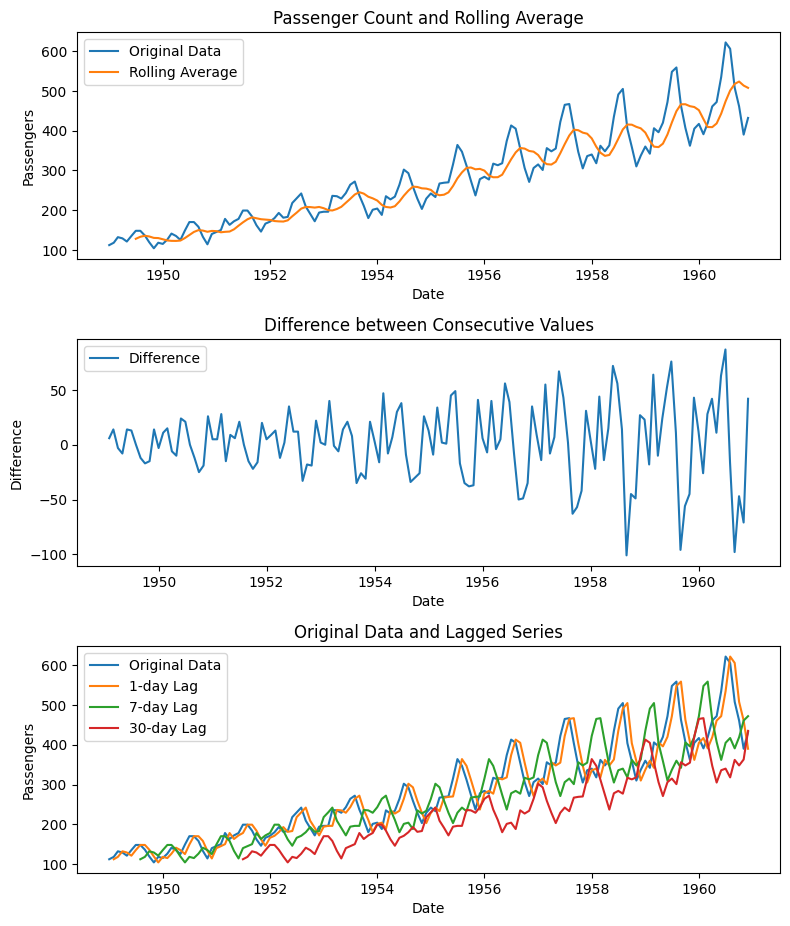

In [ ]:
# Example 1: Resample the data to monthly frequency and calculate the average 'Passengers' count
monthly_avg_passengers = df.resample('M').mean()

# Example 2: Compute a 7-day rolling average of the 'Passengers' count
rolling_avg_passengers = df.rolling(window=7).mean()

# Example 3: Calculate the difference between consecutive values ('Passengers' count)
diff_passengers = df.diff()

# Example 4: Calculate different lags of the 'Passengers' count
lag_1 = df.shift(1)  # 1-day lag
lag_7 = df.shift(7)  # 7-day lag
lag_30 = df.shift(30)  # 30-day lag

plt.figure(figsize=(8, 12))

# Plot 1: Original data and Rolling Average
plt.subplot(4, 1, 1)
plt.plot(df, label='Original Data')
plt.plot(rolling_avg_passengers, label='Rolling Average')
plt.title('Passenger Count and Rolling Average')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()

# Plot 2: Difference between Consecutive Values
plt.subplot(4, 1, 2)
plt.plot(diff_passengers, label='Difference')
plt.title('Difference between Consecutive Values')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Plot 3: Original Data and Different Lags
plt.subplot(4, 1, 3)
plt.plot(df, label='Original Data')
plt.plot(lag_1, label='1-day Lag')
plt.plot(lag_7, label='7-day Lag')
plt.plot(lag_30, label='30-day Lag')
plt.title('Original Data and Lagged Series')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()

plt.tight_layout()
plt.show()


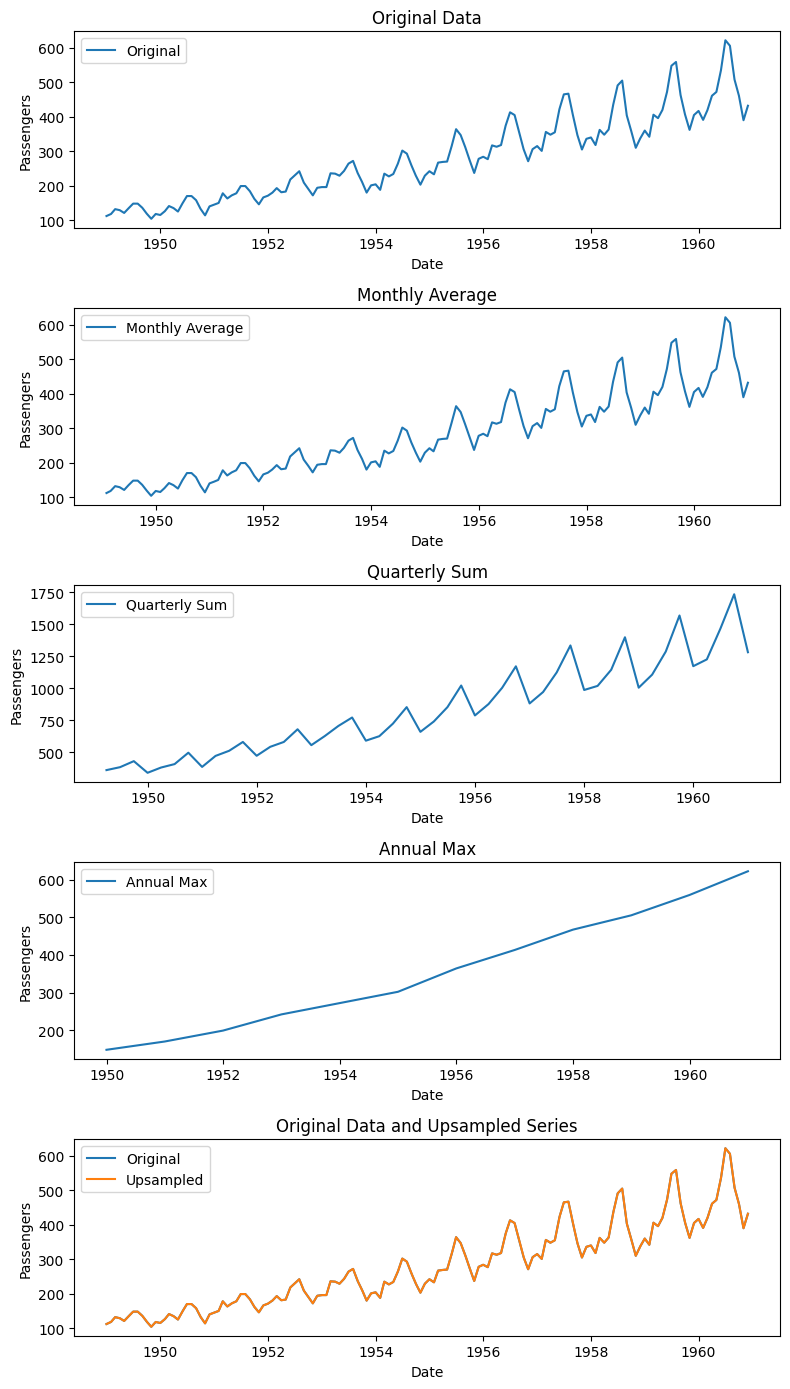

In [ ]:
# Perform time-based operations
# Example 1: Resample the data to monthly frequency and calculate the average 'Passengers' count
monthly_avg_passengers = df.resample('M').mean()

# Example 2: Resample the data to quarterly frequency and calculate the sum of 'Passengers' count
quarterly_sum_passengers = df.resample('Q').sum()

# Example 3: Resample the data to annual frequency and calculate the maximum 'Passengers' count
annual_max_passengers = df.resample('Y').max()

# Example 4: Convert the data to a higher frequency using interpolation
upsampled_passengers = df.resample('D').interpolate(method='linear')

# Example 5: Plot the original data, monthly average, quarterly sum, annual max, and upsampled series
plt.figure(figsize=(8, 14))
plt.subplot(5, 1, 1)
plt.plot(df, label='Original')
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(monthly_avg_passengers, label='Monthly Average')
plt.title('Monthly Average')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(quarterly_sum_passengers, label='Quarterly Sum')
plt.title('Quarterly Sum')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(annual_max_passengers, label='Annual Max')
plt.title('Annual Max')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(df, label='Original')
plt.plot(upsampled_passengers, label='Upsampled')
plt.title('Original Data and Upsampled Series')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()

plt.tight_layout()
plt.show()


## 15.4 Prophet
Prophet is a popular open-source library developed by Facebook's Core Data Science team for time series analysis and forecasting. It was specifically designed to handle the characteristics of business time series data, such as seasonality, multiple seasonalities, outliers, and data gaps, while providing a user-friendly interface.

Here are some key capabilities of Prophet in time series analysis and forecasting:

1. Trend forecasting: Prophet can automatically detect and model various trends in the data, including linear and non-linear trends. It captures both short-term fluctuations and long-term growth patterns, allowing you to forecast future trends.

2. Seasonality modeling: Prophet can handle multiple types of seasonality, such as daily, weekly, monthly, and yearly patterns. It incorporates these seasonal components into the forecasting model, enabling accurate predictions even in the presence of recurring patterns.

3. Holiday effects: Prophet has built-in support for modeling holiday effects, which is especially useful for businesses that experience significant variations during holiday periods. You can define custom holiday events and their impact on the time series, allowing the model to adjust the forecasts accordingly.

4. Handling outliers and data gaps: Prophet is robust to outliers and can handle missing data effectively. It employs a piecewise linear model to accommodate irregularities in the time series, making it resilient to data gaps and anomalies.

5. Automatic changepoint detection: Changepoints are points in the time series where the underlying patterns change. Prophet automatically detects these changepoints, enabling the model to capture different regimes or trends present in the data.

6. Uncertainty estimation: Prophet provides uncertainty estimates for the forecasted values. It generates prediction intervals that quantify the uncertainty associated with each forecast point, allowing you to assess the reliability of the predictions.

7. Flexibility and ease of use: Prophet offers a simple and intuitive API, making it accessible to users with varying levels of expertise in time series analysis. It integrates well with Python and R programming languages and provides a range of options for customization and fine-tuning of the forecasting model.

While Prophet is a powerful tool for many time series forecasting tasks, it's important to note that no forecasting model is universally perfect. The performance of Prophet can vary depending on the specific characteristics and complexities of the dataset being analyzed. It's always recommended to explore and compare different forecasting methods to select the most suitable approach for your particular use case.

### 15.4.1 How to use

To use the Prophet library for time series analysis and forecasting in Python, you can follow these steps:

1. Install Prophet: You can install Prophet using pip by running the following command:
   ```
   pip install prophet
   ```

2. Import the necessary modules: Import the Prophet module in your Python script. For example:
   ```python
   from prophet import Prophet
   ```

3. Prepare your time series data: Prepare your time series data as a pandas DataFrame with two columns: 'ds' (timestamp) and 'y' (value). The 'ds' column should be of type datetime, and the 'y' column should contain the numeric values you want to forecast. For example:
   ```python
   import pandas as pd
   df = pd.read_csv('your_data.csv')
   df['ds'] = pd.to_datetime(df['timestamp'])
   ```

4. Create and fit the Prophet model: Create an instance of the Prophet class and fit it to your time series data. For example:
   ```python
   model = Prophet()
   model.fit(df)
   ```

5. Generate forecasts: To generate future forecasts, you can use the `make_future_dataframe()` method of the Prophet model to create a DataFrame with future timestamps, and then use the `predict()` method to obtain the forecasted values. For example:
   ```python
   future = model.make_future_dataframe(periods=10)  # Specify the number of future time points to forecast
   forecast = model.predict(future)
   ```

6. Visualize the forecasts: You can use the `plot()` method of the Prophet model to visualize the historical data and forecasted values. For example:
   ```python
   model.plot(forecast)
   ```

7. Access the forecasted values: The forecasted values and other components (trend, seasonality, etc.) are available in the `forecast` DataFrame. You can access specific columns or export the forecasted values to a separate DataFrame for further analysis. For example:
   ```python
   forecast_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
   ```

Prophet also provides additional functionalities, such as handling missing data, including holiday effects, and specifying custom seasonalities. You can refer to the Prophet documentation for more detailed guidance on these advanced features.

Note: It's important to understand the assumptions and limitations of the Prophet model and to validate the forecasts using appropriate evaluation techniques before making critical decisions based on the forecasts.

### 15.4.2 Example Code

In [ ]:
import pandas as pd
import urllib.request
from prophet import Prophet
import matplotlib.pyplot as plt

# Download the Airline Passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
urllib.request.urlretrieve(url, "airline_passengers.csv")

# Load the Airline Passengers dataset
df = pd.read_csv("airline_passengers.csv")
df.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])
df.head(5)

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
# Prepare the dataset for Prophet
df = df.rename(columns={"Month": "ds", "Passengers": "y"})
df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
# Create and fit the Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05,
    holidays_prior_scale=10.0
)
model.fit(df)

# Generate future dates for trend analysis and prediction
future = model.make_future_dataframe(periods=12, freq='MS')

# Predicting the trend
trend_forecast = model.predict(future)



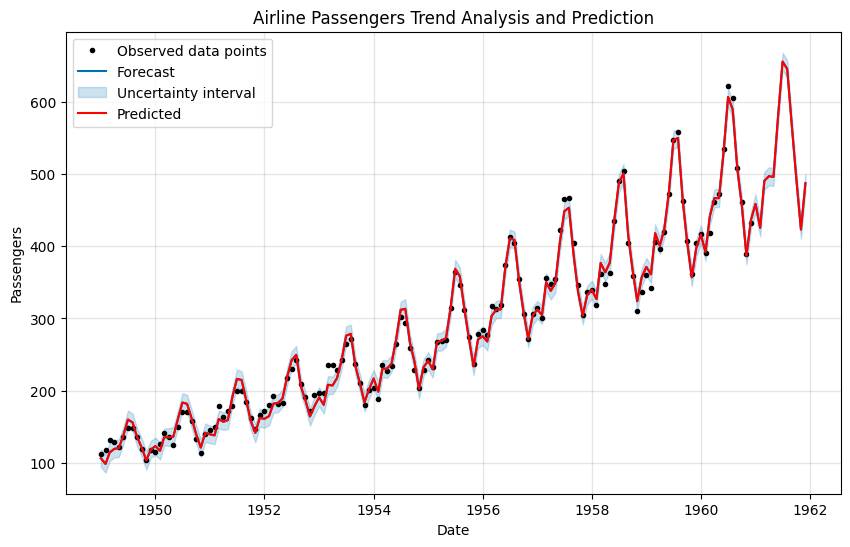

In [ ]:
# Plotting trend analysis and prediction
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(trend_forecast, ax=ax)
ax.set_title('Airline Passengers Trend Analysis and Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')

# Plotting the predicted values with a different color
plt.plot(trend_forecast['ds'], trend_forecast['yhat'], color='red', label='Predicted')

plt.legend()
plt.show()

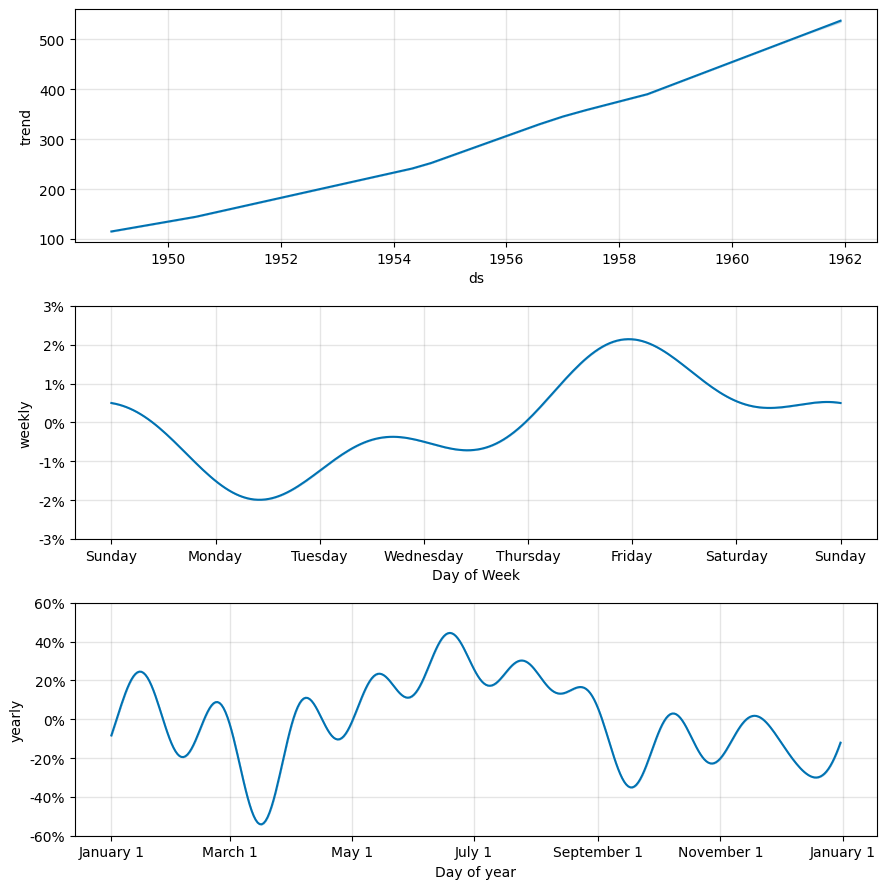

In [ ]:
# Plotting changepoints
fig = model.plot_components(trend_forecast)
plt.show()

In [ ]:
# Accessing trend forecasted values and changepoints
trend_forecast_values = trend_forecast[['ds', 'trend']]
changepoints = model.changepoints

# Print the trend forecasted values and changepoints
print("Trend forecasted values:")
print(trend_forecast_values.tail())

print("\nChangepoints:")
print(changepoints)


Trend forecasted values:
            ds       trend
151 1961-08-01  522.957009
152 1961-09-01  526.609475
153 1961-10-01  530.144120
154 1961-11-01  533.796586
155 1961-12-01  537.331230

Changepoints:
5     1949-06-01
9     1949-10-01
14    1950-03-01
18    1950-07-01
23    1950-12-01
27    1951-04-01
32    1951-09-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
50    1953-03-01
55    1953-08-01
59    1953-12-01
64    1954-05-01
68    1954-09-01
73    1955-02-01
78    1955-07-01
82    1955-11-01
87    1956-04-01
91    1956-08-01
96    1957-01-01
100   1957-05-01
105   1957-10-01
109   1958-02-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]


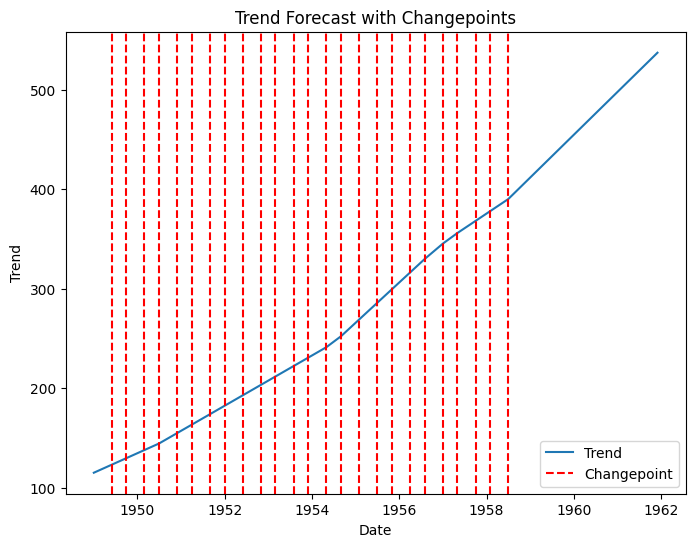

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))

# Plotting the trend
plt.plot(trend_forecast_values['ds'], trend_forecast_values['trend'], label='Trend')

# Highlighting the changepoints
for cp in changepoints:
    plt.axvline(x=cp, color='r', linestyle='--', label='Changepoint')

# Handling legends (to avoid duplicate labels)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Forecast with Changepoints')
plt.show()

This code performs time series analysis and forecasting using the Prophet library on the Airline Passengers dataset. Here's a step-by-step description of the code:

1. The code begins by importing the necessary libraries, including `pandas`, `urllib`, `Prophet`, and `matplotlib.pyplot`.

2. The Airline Passengers dataset is downloaded from a remote URL using the `urllib` library and saved as "`airline_passengers.csv`".

3. The dataset is loaded into a pandas DataFrame and the "Month" column is converted to a datetime format.

4. The dataset is prepared for Prophet by renaming the columns to match the required format (ds for the time column, and y for the target variable).

5. A Prophet model is created and configured with desired seasonality settings, changepoint prior scale, and holidays prior scale.

6. The model is fitted to the dataset, learning patterns and trends in the data.

7. Future dates are generated using the `make_future_dataframe() `function to specify a time period for forecasting.

8. The model predicts the trend and seasonality for the future dates using the` predict()` function.

9. The trend analysis and prediction are plotted using the `model.plot()` function, and the resulting plot is displayed using `plt.show()`. The plot showcases the historical data, trend, and forecasted values.

10. The `model.plot_components()` function is used to plot the individual components of the forecast (trend, seasonality, and residuals). The plot is displayed using `plt.show()`.

11. The predicted trend values and changepoints are extracted from the forecasted data.

12. The trend forecasted values and changepoints are printed to the console.

This code provides a comprehensive analysis of the Airline Passengers dataset using Prophet, including trend analysis, trend prediction, and visualization of the forecasted values and changepoints. It serves as a useful example of how to leverage Prophet for time series forecasting tasks.

## 15.5. sktime
Sktime is a Python library for time series analysis and forecasting. It provides a unified interface for multiple time series learning tasks, including classification, regression, clustering, annotation and forecasting. It comes with time series algorithms and scikit-learn compatible tools to build, tune and validate time series models.

### 15.5.1 How to use

To use the `sktime` library for time series analysis and forecasting in Python, you can follow these steps:

1. Install the `sktime` library if you haven't already done so. You can use `pip` to install it:

   ```shell
   pip install sktime
   ```

2. Import the necessary modules and functions from `sktime`:

   ```python
   import pandas as pd
   import matplotlib.pyplot as plt
   from sktime.datasets import load_airline
   from sktime.forecasting.model_selection import temporal_train_test_split
   from sktime.forecasting.compose import EnsembleForecaster
   from sktime.forecasting.exp_smoothing import ExponentialSmoothing
   from sktime.forecasting.arima import AutoARIMA
   from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
   from sktime.utils.plotting import plot_series
   ```

3. Load the time series dataset you want to work with. `sktime` provides several built-in datasets for practice. In this example, we'll use the "Airline Passengers" dataset:

   ```python
   data = load_airline()
   ```

4. Split the time series into training and test sets:

   ```python
   train_data, test_data = temporal_train_test_split(data, test_size=36)
   ```

5. Define the base forecasters with adjusted hyperparameters. You can choose different forecasters depending on your needs. For example, here we'll use Exponential Smoothing and AutoARIMA:

   ```python
   forecaster_1 = ExponentialSmoothing(trend='add', seasonal='additive', sp=12)
   forecaster_2 = AutoARIMA()
   ```

6. Create an ensemble forecaster by combining the base forecasters with weighted averaging:

   ```python
   forecaster = EnsembleForecaster(
       [
           ("es", forecaster_1),
           ("arima", forecaster_2)
       ],
       weights=[0.5, 0.5]
   )
   ```

7. Fit the ensemble forecaster to the training data:

   ```python
   forecaster.fit(train_data)
   ```

8. Make forecasts using the trained forecaster:

   ```python
   forecast = forecaster.predict(fh=[i for i in range(1, 37)])
   ```

9. Calculate the mean absolute percentage error (MAPE) to evaluate the forecast accuracy:

   ```python
   mape = mean_absolute_percentage_error(test_data, forecast)
   ```

10. Visualize the time series, test data, and forecast:

    ```python
    fig, ax = plot_series(train_data, test_data, forecast)
    ax.set_xlabel('Time')
    ax.set_ylabel('Passengers')
    ax.set_title(f'Airline Passengers (MAPE: {mape:.2f}%)')
    plt.show()
    ```

That's it! You've now used the `sktime` library for time series analysis and forecasting. Feel free to modify the code according to your specific requirements and datasets.

For more information on how to use Sktime, please refer to the documentation: https://www.sktime.net/

### 15.5.2 Example Code

In [ ]:
!pip install sktime
!pip install pmdarima

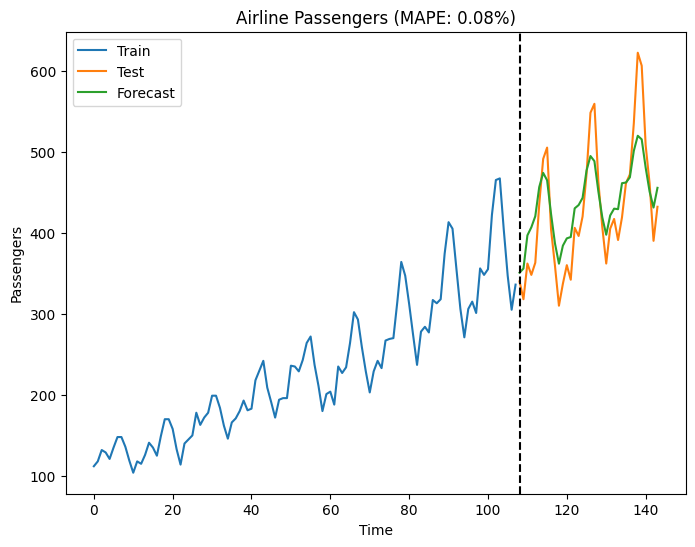

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import EnsembleForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.arima import ARIMA
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

# Load the airline passengers dataset from SKtime
data = load_airline()

# Split the time series into train and test
train_data, test_data = temporal_train_test_split(data, test_size=36)

# Define the base forecasters with adjusted hyperparameters
forecaster_1 = ExponentialSmoothing(trend='add', seasonal='additive', sp=12)
forecaster_2 = ARIMA(order=(2, 1, 2))

# Create an ensemble forecaster with weighted averaging
forecaster = EnsembleForecaster(
    [
        ("es", forecaster_1),
        ("arima", forecaster_2)
    ],
    weights=[0.5, 0.5]
)

# Fit the forecaster to the training data
forecaster.fit(train_data)

# Make forecasts
forecast = forecaster.predict(fh=[i for i in range(1, 37)])

# Convert the forecast to a list
forecast = list(forecast)

# Calculate mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(test_data, forecast)

# Visualize the time series and forecasts
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the train data
ax.plot(range(0, len(train_data)), train_data.to_numpy(), label='Train')

# Plot the test data
ax.plot(range(len(train_data), len(train_data) + len(test_data)), test_data.to_numpy(), label='Test')

# Plot the forecast
ax.plot(range(len(train_data), len(train_data) + len(test_data)), forecast, label='Forecast')

# Add a legend
ax.legend()

# Set the x-label
ax.set_xlabel('Time')

# Set the y-label
ax.set_ylabel('Passengers')

# Set the title
ax.set_title(f'Airline Passengers (MAPE: {mape:.2f}%)')

# Add a vertical line to separate the train and test data
ax.axvline(x=len(train_data), color='black', linestyle='--')

# Show the plot
plt.show()


## 15.6 Tslearn
The `tslearn` library is a Python package specifically designed for time series analysis and machine learning tasks on time series data. It provides various tools, algorithms, and models that can be used for time series analysis and forecasting. Here's a general overview of how you can use `tslearn` for time series analysis and forecasting:

1. **Data Preparation:** Prepare your time series data in a suitable format. Ensure that your data is organized as a numpy array or pandas DataFrame with appropriate dimensions (e.g., shape [n_samples, n_features]).

2. **Time Series Visualization:** Use `tslearn` to visualize your time series data. The library provides plotting functions to visualize time series data, such as line plots, scatter plots, and heatmaps.

3. **Feature Extraction:** Extract relevant features from your time series data using `tslearn`. The library offers various feature extraction methods, including time series representation techniques like Piecewise Aggregate Approximation (PAA), Symbolic Aggregate approXimation (SAX), and more.

4. **Time Series Clustering:** Apply clustering algorithms from `tslearn` to group similar time series together. You can use methods like k-means, DBSCAN, or hierarchical clustering to identify patterns and similarities in your time series data.

5. **Time Series Classification:** Utilize `tslearn` for time series classification tasks. Train and evaluate classification models, such as k-nearest neighbors (KNN), support vector machines (SVM), or convolutional neural networks (CNN), using your labeled time series data.

6. **Time Series Forecasting:** For time series forecasting, `tslearn` provides several models, including autoregressive models, recurrent neural networks (RNNs), and Long Short-Term Memory (LSTM) networks. You can train these models on your historical time series data and make predictions for future time steps.

7. **Model Evaluation:** Evaluate the performance of your time series models using appropriate metrics, such as mean squared error (MSE), mean absolute error (MAE), or root mean squared error (RMSE). `tslearn` provides evaluation functions to assess the performance of your models.

8. **Model Selection and Tuning:** Experiment with different models and hyperparameters to find the best performing model for your time series analysis and forecasting task. You can use techniques like cross-validation and grid search for model selection and hyperparameter tuning.

9. **Ensemble Methods:** Combine multiple models or forecasts using ensemble methods available in `tslearn`, such as model averaging or stacking, to improve the overall accuracy and robustness of your forecasts.

It's worth noting that `tslearn` focuses on machine learning tasks specifically for time series data, and it provides a range of specialized algorithms and techniques tailored for time series analysis. However, if you require more advanced time series forecasting capabilities, you may want to consider libraries like `Prophet`, `PyCaret`, or `statsmodels`, which offer additional functionality and specific models for forecasting tasks.

### 15.6.1 How to use

To use the `tslearn` library in Python for time series analysis and forecasting, you can follow these steps:

1. Install the `tslearn` library:
   ```
   pip install tslearn
   ```

2. Import the necessary modules:
   ```python
   import numpy as np
   from tslearn.preprocessing import TimeSeriesScalerMeanVariance
   from tslearn.clustering import TimeSeriesKMeans
   from tslearn.utils import to_time_series_dataset
   from tslearn.generators import random_walks
   from tslearn.piecewise import SymbolicAggregateApproximation
   from tslearn.svm import TimeSeriesSVC
   from tslearn.metrics import cdist_dtw
   from tslearn.clustering import TimeSeriesKMeans
   from tslearn.preprocessing import TimeSeriesScalerMinMax
   from tslearn.piecewise import PiecewiseAggregateApproximation
   from tslearn.piecewise import SymbolicAggregateApproximation
   from tslearn.clustering import silhouette_score
   from tslearn.clustering import TimeSeriesKMeans
   from tslearn.clustering import TimeSeriesCentroidBasedClustering
   from tslearn.clustering import KShape
   from tslearn.datasets import CachedDatasets
   from tslearn.utils import to_time_series
   ```

3. Preprocess and scale your time series data:
   ```python
   # Assuming you have a numpy array of time series data named 'data'
   # Reshape your data if it's a 1D array
   if data.ndim == 1:
       data = data.reshape(-1, 1)

   # Scale your time series data
   scaler = TimeSeriesScalerMeanVariance()
   data_scaled = scaler.fit_transform(data)
   ```

4. Perform time series clustering using k-means:
   ```python
   # Assuming you want to perform k-means clustering with 3 clusters
   n_clusters = 3

   # Convert your scaled data to time series dataset
   X = to_time_series_dataset(data_scaled)

   # Perform k-means clustering
   km = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw")
   km.fit(X)
   ```

5. Perform time series forecasting using the available methods, such as ARIMA, LSTM, or any other appropriate method for your data. You can refer to the `tslearn` documentation and examples for specific forecasting techniques.

These steps provide a basic outline of using the `tslearn` library for time series analysis and forecasting. You may need to adapt them according to your specific data and analysis requirements. Remember to consult the `tslearn` documentation for more details on available methods and their usage.

### 15.6.2 Example Code

In [ ]:
!pip install tslearn

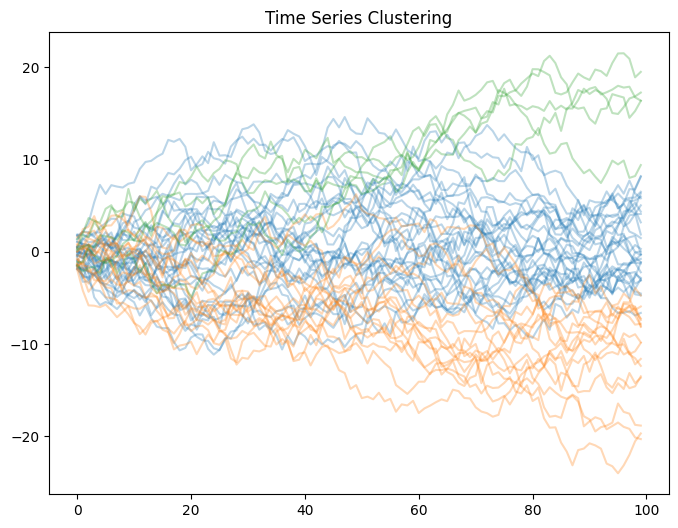

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.generators import random_walks
from tslearn.utils import to_time_series_dataset
from tslearn.metrics import dtw_path

# Generate some random time series data
np.random.seed(0)
X = random_walks(n_ts=50, sz=100, d=1)

# Time series clustering using k-means
n_clusters = 3
km = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw")
km.fit(X)

# Visualize clustering results
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster = X[km.labels_ == i]
    for ts in cluster:
        plt.plot(ts.ravel(), color='C'+str(i), alpha=0.3)
plt.title("Time Series Clustering")
plt.show()

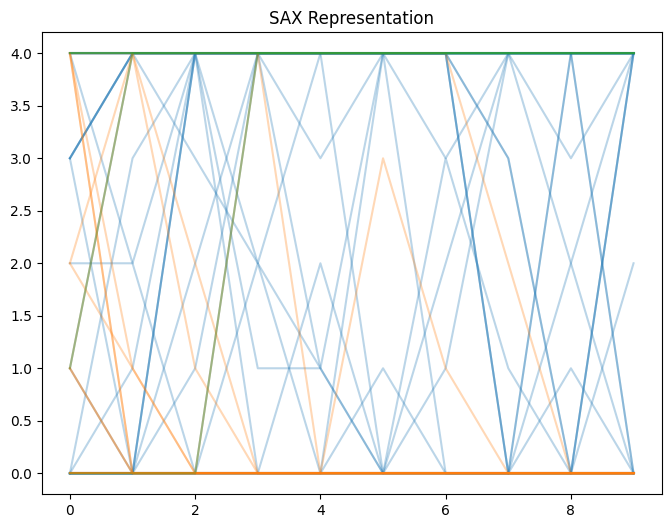

In [ ]:
# Symbolic Aggregate Approximation (SAX)
sax = SymbolicAggregateApproximation(n_segments=10, alphabet_size_avg=5)
X_sax = sax.fit_transform(X)

# Visualize SAX representation
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster = X_sax[km.labels_ == i]
    for ts in cluster:
        plt.plot(ts.ravel(), color='C'+str(i), alpha=0.3)
plt.title("SAX Representation")
plt.show()

In [ ]:
# Conversion between time series dataset formats
X_dataset = to_time_series_dataset(X)

# Calculate DTW distance matrix
dist_matrix = np.zeros((len(X_dataset), len(X_dataset)))
for i in range(len(X_dataset)):
    for j in range(i + 1, len(X_dataset)):
        path, dist = dtw_path(X_dataset[i], X_dataset[j])
        dist_matrix[i, j] = dist_matrix[j, i] = dist

# Time series classification (SVM)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tslearn.svm import TimeSeriesSVC

# Generate random labels
y = np.random.randint(low=0, high=2, size=len(X))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y, test_size=0.2)

# Train an SVM classifier
svm = TimeSeriesSVC(kernel="gak")
svm.fit(X_train, y_train)

# Make predictions on test set
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5


## 15.7 Darts
The `Darts` library is a powerful tool for time series analysis and forecasting in Python. Here's an overview of how you can use `Darts` for these tasks:

1. **Data Preparation:** Prepare your time series data. `Darts` works with pandas DataFrames or Darts TimeSeries objects. Ensure that your data is organized with a suitable time index and the corresponding values.

2. **Time Series Visualization:** Use the plotting functions provided by `Darts` to visualize your time series data. You can plot the entire time series or specific segments, and customize the plot appearance to highlight important features.

3. **Time Series Modeling:** `Darts` offers a wide range of time series models for forecasting. Some popular models include AutoARIMA, Exponential Smoothing, Prophet, and LSTM. Choose a model based on your requirements and fit it to your training data using the `fit()` method.

4. **Forecasting:** Once the model is fitted, you can use it to make forecasts. Use the `predict()` method to generate future predictions based on the trained model. You can specify the number of steps ahead to forecast.

5. **Model Evaluation:** Assess the performance of your forecasts using evaluation metrics provided by `Darts`, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or Mean Absolute Percentage Error (MAPE).

6. **Visualization and Analysis:** Visualize the original time series, the forecasts, and the evaluation results using the plotting functions in `Darts`. Analyze the accuracy of the forecasts and make adjustments to the model or hyperparameters if needed.

`Darts` also provides additional functionality for time series decomposition, anomaly detection, and feature engineering. You can refer to the `Darts` documentation and examples for more detailed usage instructions and code samples.


### 15.7.1 How to use

To use the Darts Python library for time series analysis and forecasting, you can follow these steps:

1. Install Darts: Start by installing the Darts library using pip, a package manager for Python. Open a terminal or command prompt and run the following command:

   ```
   pip install u8darts
   ```

2. Import the necessary modules: Once Darts is installed, import the required modules in your Python script or notebook:

   ```python
   from darts import TimeSeries
   from darts.models import Prophet
   from darts.dataprocessing.transformers import Scaler
   from darts.metrics import mape
   ```

3. Load and preprocess your time series data: Load your time series data into a Darts TimeSeries object. The TimeSeries class provides various methods for loading data from different sources, such as CSV files, pandas DataFrames, or NumPy arrays. Here's an example of loading data from a CSV file:

   ```python
   series = TimeSeries.from_csv('your_data.csv', sep=',', parse_dates=True, index_col='timestamp', value_col='value')
   ```

   You may need to adjust the arguments depending on your data format.

4. Split the data into training and validation sets: Divide your time series data into training and validation sets. This is important for evaluating the performance of your models. Here's an example of splitting the data:

   ```python
   train_size = int(len(series) * 0.8)  # 80% for training, 20% for validation
   train_series, val_series = series[:train_size], series[train_size:]
   ```

5. Initialize and train a forecasting model: Choose a forecasting model from the available models in Darts and initialize it with the desired configuration. For example, to use the Prophet model:

   ```python
   model = Prophet()
   model.fit(train_series)
   ```

   Darts provides several other models such as ARIMA, Exponential Smoothing, and LSTM, among others.

6. Make predictions and evaluate the model: Use the trained model to generate predictions on the validation set. Then, evaluate the performance of the model using appropriate metrics. For example:

   ```python
   predicted_series = model.predict(len(val_series))
   error = mape(val_series, predicted_series)
   print(f"MAPE: {error}")
   ```

   You can choose different evaluation metrics depending on your specific requirements.

7. Visualize the results: Finally, visualize the actual and predicted values to gain insights into the model's performance. Darts provides built-in plotting functions that can be used to create visualizations. For example:

   ```python
   series.plot(label='Actual')
   predicted_series.plot(label='Predicted')
   plt.legend()
   plt.show()
   ```

   Make sure to import the necessary libraries, such as matplotlib, for plotting.

These steps provide a basic overview of using Darts for time series analysis and forecasting. You can explore the Darts documentation (https://unit8co.github.io/darts/) for more detailed information, additional models, and advanced techniques.

### 15.7.2 Example Code
Below is an example code that demonstrates some of the capabilities of the Darts library for time series analysis. The code covers various aspects such as data manipulation, visualization, model training, and forecasting using Darts.

In [ ]:
!pip install u8darts
!pip install sktime

Mean Absolute Error: 31.78


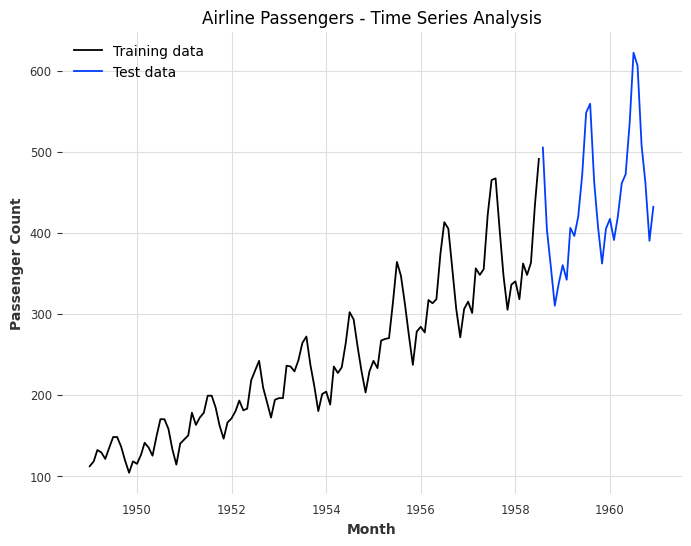

In [ ]:
import pandas as pd
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import urllib.request

# Download the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
urllib.request.urlretrieve(url, 'AirPassengers.csv')

# Load the dataset
df = pd.read_csv('AirPassengers.csv')

# Convert the column names to lowercase
df.columns = df.columns.str.lower()

# Convert the 'month' column to datetime type
df['month'] = pd.to_datetime(df['month'])

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Create TimeSeries objects from training and test data
train_series = TimeSeries.from_dataframe(train_data, 'month', 'passengers')
test_series = TimeSeries.from_dataframe(test_data, 'month', 'passengers')

# Create and fit the Exponential Smoothing model
model = ExponentialSmoothing()
model.fit(train_series)

# Predict the future values
predictions = model.predict(len(test_data))

# Convert the predicted values to a pandas DataFrame
pred_df = predictions.pd_dataframe()

# Calculate the mean absolute error
mae = mean_absolute_error(test_series.values(), predictions.values())
print(f"Mean Absolute Error: {mae:.2f}")

# Plot the actual and predicted values
plt.figure(figsize=(8, 6))
plt.plot(train_data['month'], train_data['passengers'], label='Training data')
plt.plot(test_data['month'], test_data['passengers'], label='Test data')
plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.title('Airline Passengers - Time Series Analysis')
plt.legend()
plt.show()


## 15.8 PyFlux

### 15.8.1 How to use

To use the PyFlux library for time series analysis and forecasting, you can follow these steps:

1. Install PyFlux: You can install PyFlux using pip by running the following command:
   ```
   pip install pyflux
   ```

2. Import the required modules: Import the necessary modules from PyFlux and other libraries:
   ```python
   import pandas as pd
   import matplotlib.pyplot as plt
   import pyflux as pf
   from sklearn.metrics import mean_absolute_error
   ```

3. Prepare the data: Load or prepare your time series data as a pandas DataFrame with a DateTime index.

4. Define and fit a model: Choose a suitable model from PyFlux and fit it to your data. For example, you can use the ARIMA model as follows:
   ```python
   # Convert the pandas DataFrame to a PyFlux TimeSeries object
   series = pf.TimeSeriesData(dataframe=df, target='your_target_column')

   # Define the ARIMA model
   model = pf.ARIMA(data=series, ar=1, ma=1, target='your_target_column')

   # Fit the model to the data
   model.fit()
   ```

5. Make forecasts: Once the model is fitted, you can make forecasts for future time points:
   ```python
   # Forecast future time points
   forecast = model.predict(h=10)  # Specify the number of future time points to forecast

   # Access the forecasted values
   forecast_values = forecast.values['your_target_column'].values
   ```

6. Evaluate the model: Assess the performance of your model using appropriate evaluation metrics:
   ```python
   # Prepare the actual values for comparison
   actual_values = series.values['your_target_column'].values[-10:]  # Assuming you have actual values for comparison

   # Calculate the Mean Absolute Error (MAE)
   mae = mean_absolute_error(actual_values, forecast_values)
   ```

7. Visualize the results: Plot the time series data, the forecasted values, and any other relevant information:
   ```python
   # Visualize the time series and the forecasted values
   plt.figure(figsize=(12, 6))
   plt.plot(series.time, series.values['your_target_column'].values, label='Actual')
   plt.plot(forecast.index, forecast.values['your_target_column'].values, label='Forecast')
   plt.xlabel('Time')
   plt.ylabel('Your Target Variable')
   plt.title('Time Series Forecast')
   plt.legend()
   plt.show()
   ```

Remember to replace `'your_target_column'` with the name of the column containing the target variable in your DataFrame.

These steps provide a general overview of using PyFlux for time series analysis and forecasting. You can explore different models, adjust model parameters, and apply additional techniques offered by the PyFlux library to further enhance your analysis.

### 15.8.2 Example Code

In [ ]:
!pip install git+https://github.com/RJT1990/pyflux.git

Mean Absolute Error: 28.55


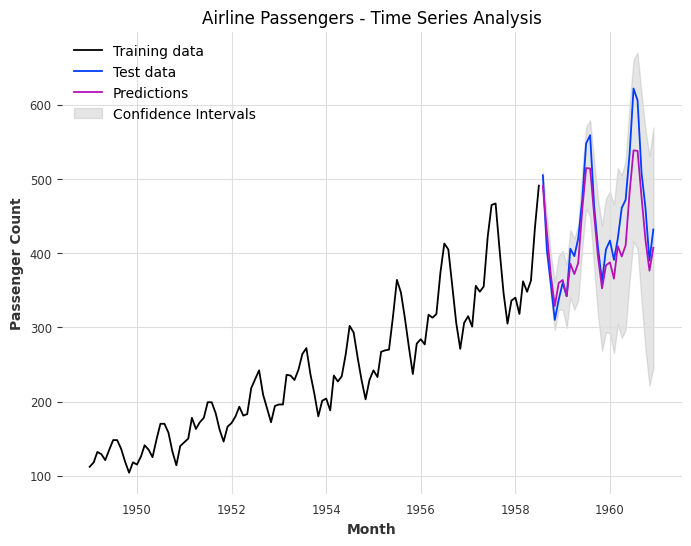

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import pmdarima as pm
import numpy as np
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Download the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
urllib.request.urlretrieve(url, 'AirPassengers.csv')

# Load the dataset
df = pd.read_csv('AirPassengers.csv')

# Convert the 'Month' column to datetime type
df['Month'] = pd.to_datetime(df['Month'])

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Find the optimal hyperparameters using auto_arima
model = pm.auto_arima(train_data['Passengers'], seasonal=True, m=12, suppress_warnings=True)

# Fit the SARIMAX model with the optimal hyperparameters
sarimax_model = SARIMAX(train_data['Passengers'], order=model.order, seasonal_order=model.seasonal_order)
sarimax_model_fit = sarimax_model.fit()

# Forecast future values
predictions = sarimax_model_fit.get_forecast(steps=len(test_data))

# Extract the predicted values and confidence intervals
predicted_values = predictions.predicted_mean
ci_lower = predictions.conf_int().iloc[:, 0]
ci_upper = predictions.conf_int().iloc[:, 1]

# Calculate the mean absolute error
mae = mean_absolute_error(test_data['Passengers'], predicted_values)
print(f"Mean Absolute Error: {mae:.2f}")

# Plot the actual and predicted values with confidence intervals
plt.figure(figsize=(8, 6))
plt.plot(train_data['Month'], train_data['Passengers'], label='Training data')
plt.plot(test_data['Month'], test_data['Passengers'], label='Test data')
plt.plot(test_data['Month'], predicted_values, label='Predictions')
plt.fill_between(test_data['Month'], ci_lower, ci_upper, color='gray', alpha=0.2, label='Confidence Intervals')
plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.title('Airline Passengers - Time Series Analysis')
plt.legend()
plt.show()


## 15.9 SFRESH
The TSFRESH (Time Series Feature Extraction on Basis of Scalable Hypothesis tests) library in Python is designed to perform automated feature extraction from time series data. It provides a wide range of statistical and information-theoretic features that can be used for time series analysis and forecasting.

### 15.9.1 How to use
Here's how you can use TSFRESH:

1. Install TSFRESH: You can install TSFRESH using pip by running the following command:
   ```
   pip install tsfresh
   ```

2. Import the necessary modules: Import the TSFRESH module in your Python script. For example:
   ```python
   from tsfresh import extract_features
   from tsfresh.utilities.dataframe_functions import impute
   ```

3. Prepare your time series data: Prepare your time series data as a pandas DataFrame with two columns: 'id' and 'time'. The 'id' column should represent the individual time series, and the 'time' column should contain the timestamps. Additional columns can be included for the time series values or other relevant attributes. For example:
   ```python
   import pandas as pd
   df = pd.read_csv('your_data.csv')
   ```

4. Extract features: Use the `extract_features()` function from TSFRESH to extract a comprehensive set of features from your time series data. For example:
   ```python
   extracted_features = extract_features(df, column_id='id', column_sort='time')
   ```

5. Handle missing values: TSFRESH provides a utility function `impute()` to handle missing values in the extracted features. It replaces missing values with appropriate imputed values. For example:
   ```python
   imputed_features = impute(extracted_features)
   ```

6. Use the extracted features: You can use the extracted features for various purposes such as time series classification, regression, or forecasting. You can feed the features into a machine learning model of your choice. For forecasting, you can use regression models to predict future values based on the extracted features.

TSFRESH also offers options to customize the feature extraction process by selecting specific feature calculators, specifying custom parameters, or adding additional domain-specific features. You can refer to the TSFRESH documentation for more detailed guidance on these advanced features.

Note: TSFRESH is primarily focused on feature extraction and doesn't include built-in forecasting models. You will need to combine TSFRESH with appropriate machine learning or time series forecasting models to perform forecasting tasks.

### 15.9.2 2.Example Code

In [ ]:
!pip install tsfresh

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tsfresh import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters
from statsmodels.tsa.seasonal import seasonal_decompose

# Download the Airline Passengers dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'])

# Set the 'Month' column as the index
df.set_index('Month', inplace=True)

# Assign a dummy column as the identifier
df['id'] = 1

# Extract features using tsfresh
extracted_features = extract_features(df, column_id='id', default_fc_parameters=ComprehensiveFCParameters())

# Perform trend and seasonality decomposition
decomposition = seasonal_decompose(df['Passengers'], model='additive', two_sided=False)

# Add trend and seasonal components to the extracted features
extracted_features['trend'] = decomposition.trend
extracted_features['seasonal'] = decomposition.seasonal

# Simple Moving Average forecast
window_size = 12
df['SMA'] = df['Passengers'].rolling(window=window_size).mean()





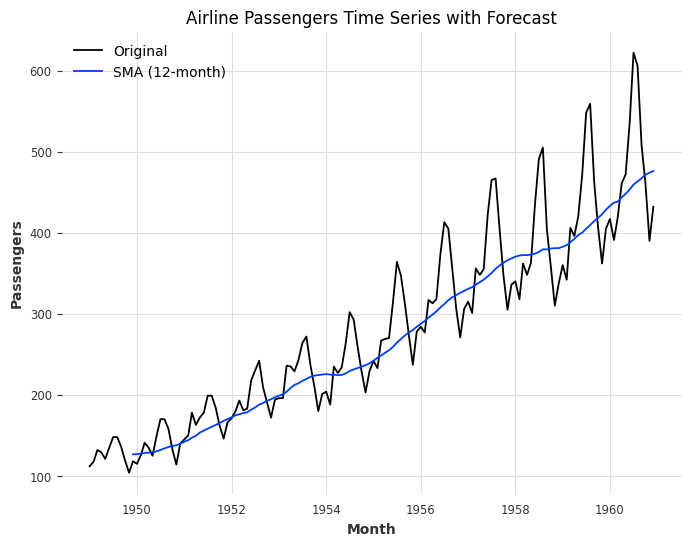

In [ ]:
# Plotting the original time series and the forecast
plt.figure(figsize=(8, 6))
plt.plot(df.index, df['Passengers'], label='Original')
plt.plot(df.index, df['SMA'], label=f'SMA ({window_size}-month)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Airline Passengers Time Series with Forecast')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tsfresh import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Download the Airline Passengers dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'])

# Set the 'Month' column as the index
df.set_index('Month', inplace=True)

# Assign a dummy column as the identifier
df['id'] = 1

# Extract features using tsfresh
extracted_features = extract_features(df, column_id='id', default_fc_parameters=ComprehensiveFCParameters())

# Perform trend and seasonality decomposition
decomposition = seasonal_decompose(df['Passengers'], model='additive', two_sided=False)

# Add trend and seasonal components to the extracted features
extracted_features['trend'] = decomposition.trend
extracted_features['seasonal'] = decomposition.seasonal

# ARIMA forecast
model = ARIMA(df['Passengers'], order=(1, 1, 1))
model_fit = model.fit()
df['ARIMA'] = model_fit.predict(start=df.index[0], end=df.index[-1])


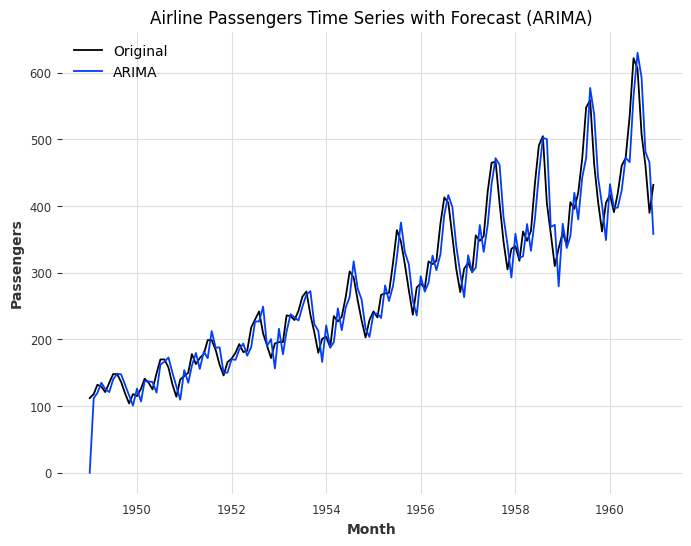

In [ ]:
# Plotting the original time series and the forecast
plt.figure(figsize=(8, 6))
plt.plot(df.index, df['Passengers'], label='Original')
plt.plot(df.index, df['ARIMA'], label='ARIMA')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Airline Passengers Time Series with Forecast (ARIMA)')
plt.legend()
plt.show()

## 15.11 Pastas
The Pastas library is a Python library specifically designed for time series analysis and modeling of hydrological and groundwater data. It provides a range of tools and models for time series analysis, including spectral analysis, regression analysis, and time series decomposition.



### 15.11.1 How to use
Here's a general overview of how you can use the Pastas library for time series analysis and forecasting:

1. Install Pastas: You can install Pastas using pip with the command
```python
  pip install pastas
  ```

2. Import the necessary modules: In your Python script or notebook, import the required modules from Pastas, as well as any additional libraries you plan to use for analysis or visualization.

   ```python
   import pastas as ps
   import pandas as pd
   import matplotlib.pyplot as plt
   # Import other required libraries
   ```

3. Load and preprocess time series data: Load your time series data into a suitable data structure. Pastas accepts data in the form of a Pandas DataFrame with a DateTime index representing the timestamps and a column for the target values. You may need to preprocess the data if it's not in the desired format.

   ```python
   # Example: Creating a Pandas DataFrame with timestamps and target values
   df = pd.DataFrame({
       'date': ['2021-01-01', '2021-01-02', '2021-01-03'],
       'value': [10, 15, 12]
   })

   # Convert the 'date' column to datetime type and set it as the index
   df['date'] = pd.to_datetime(df['date'])
   df.set_index('date', inplace=True)
   ```

4. Create a Pastas model: Instantiate a Pastas model, such as the `Model` class, to represent your time series data and the desired analysis.

   ```python
   # Example: Creating a Model object in Pastas
   model = ps.Model(df['value'])
   ```

5. Add stress models: If your time series data is influenced by external factors (known as stresses), you can add stress models to the Pastas model. Stress models can include rainfall, evaporation, or any other relevant time-varying data that affects your target variable.

   ```python
   # Example: Adding a recharge stress model
   stress_model = ps.RechargeModel()
   model.add_stressmodel(stress_model)
   ```

6. Solve the model: Use the `solve()` method to estimate the model parameters and obtain the best fit.

   ```python
   # Solve the model to estimate parameters
   model.solve()
   ```

7. Visualize the results: You can use the plotting capabilities of Pastas to visualize the model results and analyze the time series data.

   ```python
   # Example: Plotting the observed and modeled time series
   model.plot()
   plt.show()
   ```

8. Make forecasts: Once the model is fitted, you can use it to make forecasts for future time points using the `simulate()` method.

   ```python
   # Generate forecasts for future time points
   forecast_df = model.simulate(start=pd.Timestamp('2021-01-01'), end=pd.Timestamp('2021-01-10'))
   ```

Remember to consult the Pastas documentation and examples for more details on different model options, available stress models, and additional functionalities provided by the library.

### 15.11.2 Example Code

In [ ]:
!pip install pastas

Fit report Passengers              Fit Statistics
nfev    4                      EVP           0.00
nobs    143                    R2           -0.00
noise   True                   RMSE         33.64
tmin    1949-02-01 00:00:00    AIC         995.97
tmax    1960-12-01 00:00:00    BIC        1001.89
freq    D                      Obj       73608.83
warmup  3650 days 00:00:00     ___               
solver  LeastSquares           Interp.         No

Parameters (2 optimized)
               optimal    stderr    initial  vary
constant_d    2.318491  ±166.27%   2.237762  True
noise_alpha  25.353535   ±22.30%  31.000000  True


[<Axes: xlabel='Month'>,
 <Axes: xlabel='Month'>,
 <Axes: title={'left': 'Model Parameters ($n_c$=2)'}>]

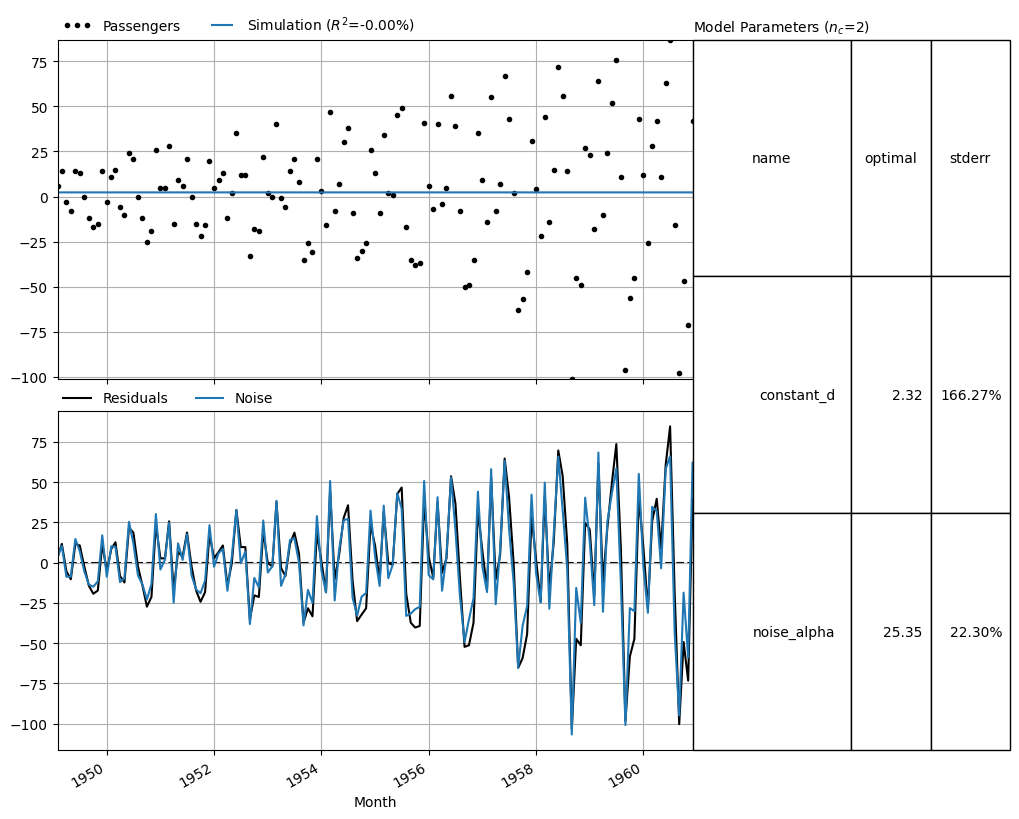

In [ ]:
import pandas as pd
import pastas as ps
import urllib.request

# Download the airline passenger dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
filename = "airline-passengers.csv"
urllib.request.urlretrieve(url, filename)

# Load the time series data
data = pd.read_csv("airline-passengers.csv", parse_dates=True, index_col="Month")

# Preprocess the data
data["Passengers"] = data["Passengers"].interpolate()  # Interpolate missing values
data["Passengers"] = data["Passengers"].diff().fillna(0)  # Compute differences
data = data[1:]  # Remove the first row with NaN

# Create a time series model
model = ps.Model(data["Passengers"])

# Solve the model
model.solve()



# Plot the results
model.plots.results()


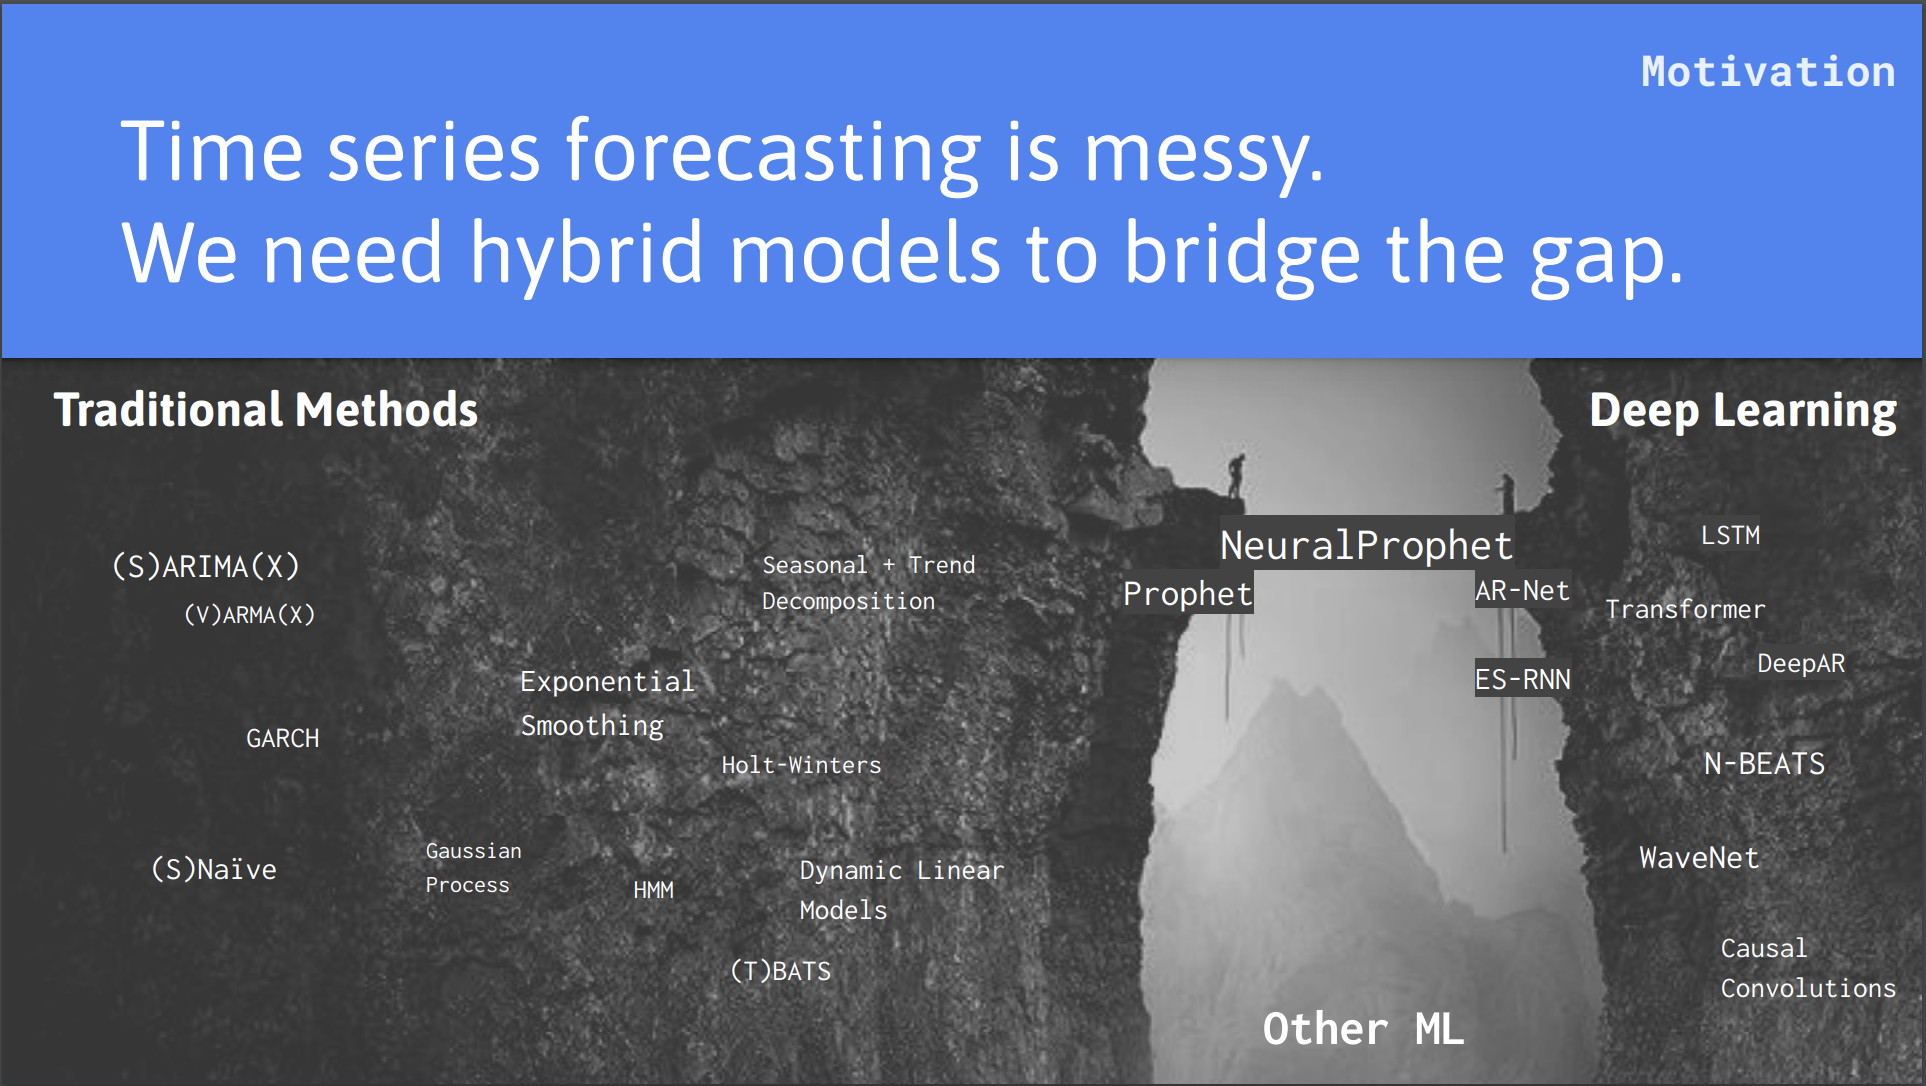

image source: neuralphrophet officail document